## Models To Implement:
#### 1. Naive Bayes
#### 2. Suport Vector Machine
#### 3. Random Forest
#### 4. Gradient-Boost
#### 5. K-Nearest Neighbours

## Libraries

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import warnings
import random
import urllib.request, urllib.parse, urllib.error
import json
import requests
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from bs4 import BeautifulSoup
import lxml

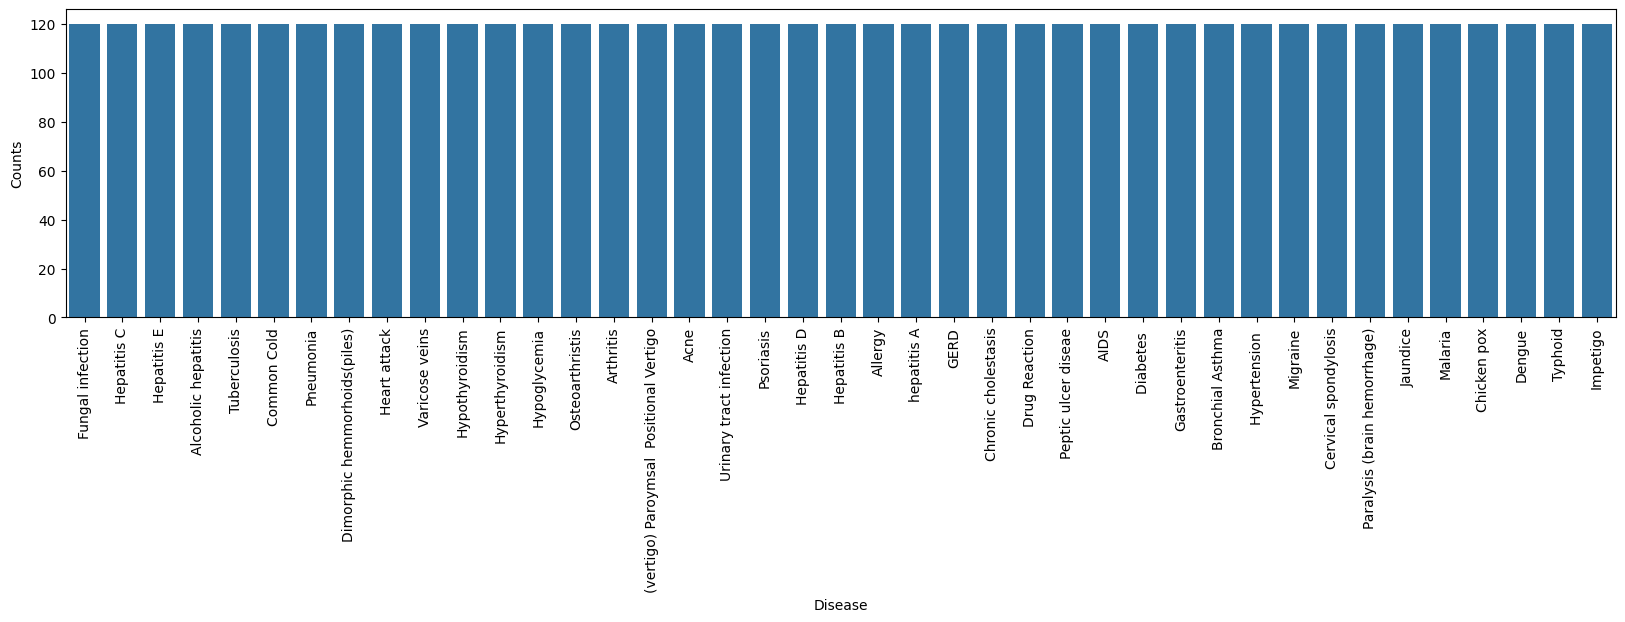

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the path to the dataset
DATA_PATH = "Training.csv"

# Reading the dataset into a pandas DataFrame and dropping columns with missing values
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Checking whether the dataset is balanced or not by counting the occurrences of each unique value in the "prognosis" column
disease_counts = data["prognosis"].value_counts()

# Creating a temporary DataFrame to visualize the counts of each disease
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

# Creating a bar plot to visualize the counts of each disease
plt.figure(figsize=(20, 4))  # Setting the figure size
sns.barplot(x="Disease", y="Counts", data=temp_df)  # Creating the bar plot using seaborn
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.show()  # Displaying the plot

# Balanced Dataset

In [2]:
# Importing necessary libraries for encoding and splitting the data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

# Separating features (X) and target variable (y)
X = data.iloc[:, :-1]  # Features are all columns except the last one
y = data.iloc[:, -1]   # Target variable is the last column

# Splitting the dataset into training and testing sets
# Using 80% of the data for training and 20% for testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Printing the shapes of the training and testing sets
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


Accuracy on train data by SVM Classifier: 100.00%
Accuracy on test data by SVM Classifier: 100.00%


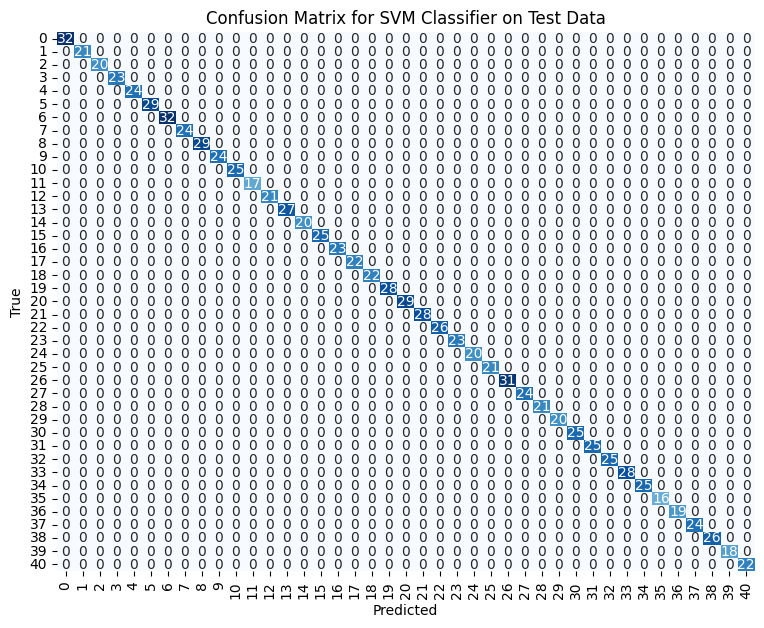

In [5]:
# Importing necessary libraries for SVM classification and evaluation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Training and testing SVM Classifier
svm_model = SVC()  # Creating an instance of SVM Classifier
svm_model.fit(X_train, y_train)  # Training the model on the training data
preds = svm_model.predict(X_test)  # Making predictions on the test data

# Calculating and printing the accuracy on the training data
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train)) * 100
print(f"Accuracy on train data by SVM Classifier: {train_accuracy:.2f}%")

# Calculating and printing the accuracy on the test data
test_accuracy = accuracy_score(y_test, preds) * 100
print(f"Accuracy on test data by SVM Classifier: {test_accuracy:.2f}%")

# Generating the confusion matrix and visualizing it using a heatmap
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(9, 7))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


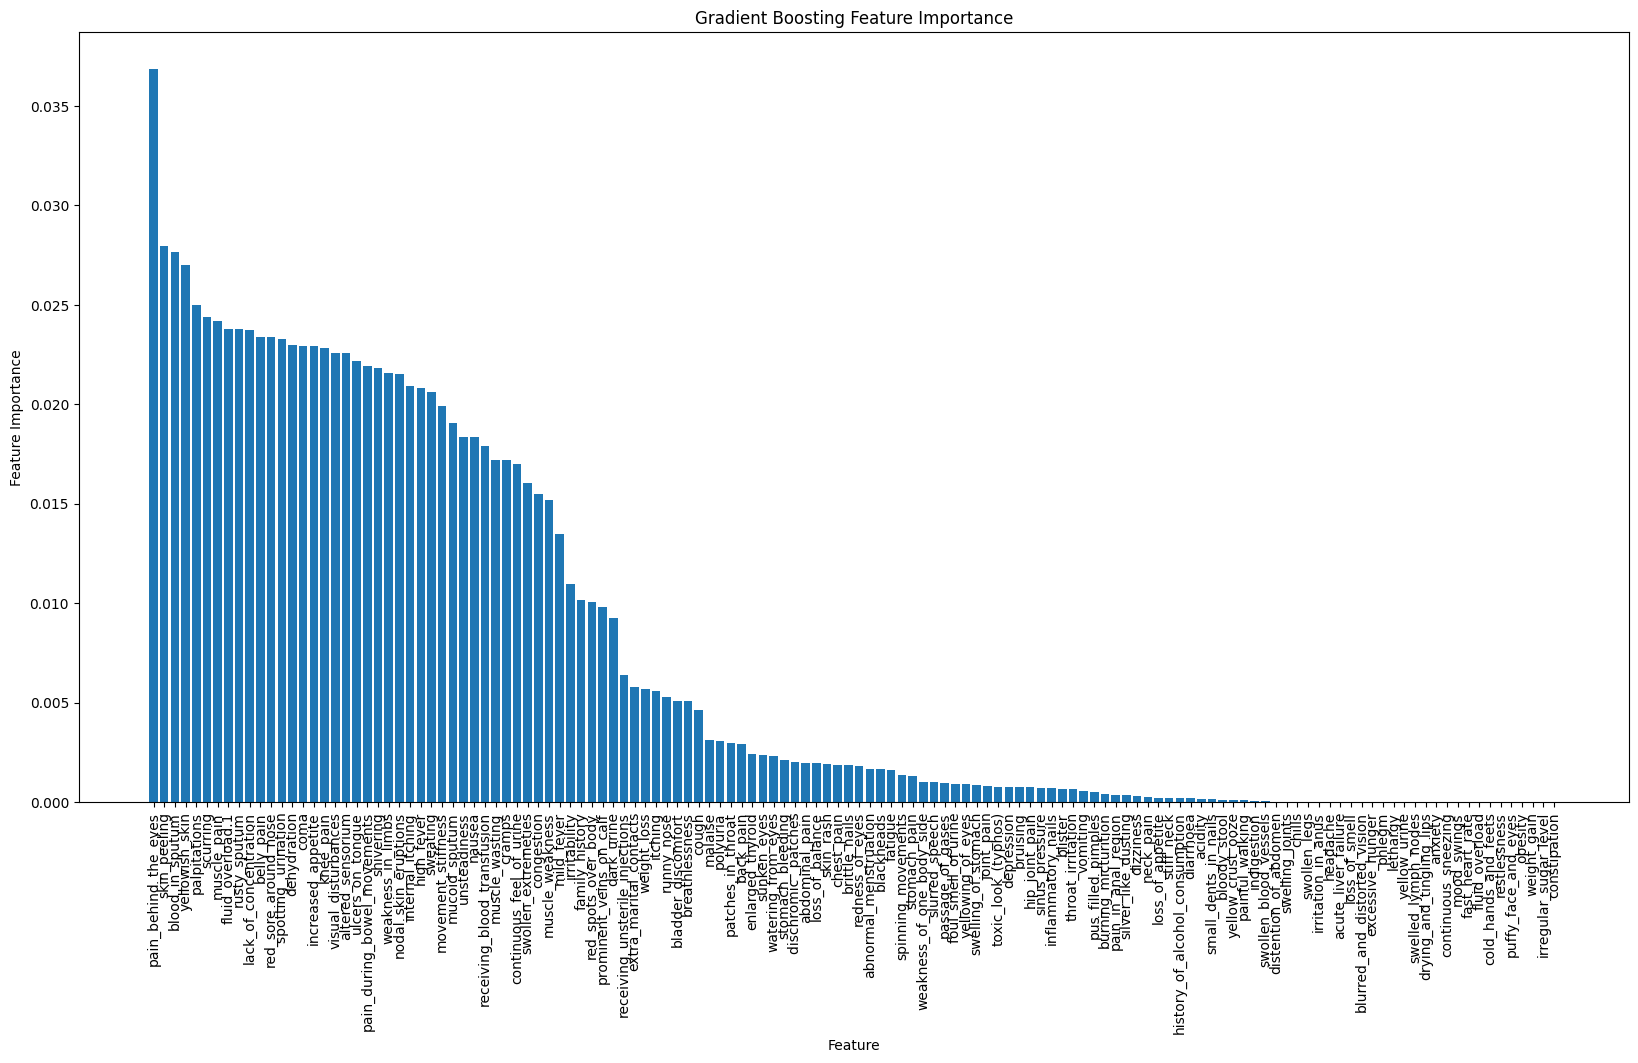

Accuracy on train data by GradientBoostingClassifier: 100.00%
Accuracy on test data by GradientBoostingClassifier: 100.00%


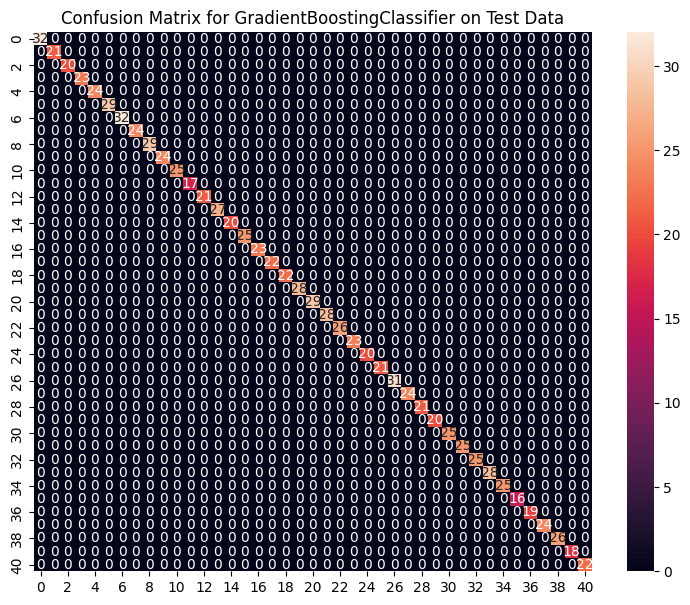

In [8]:
# Create a GradientBoostingClassifier with specified parameters
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the GradientBoostingClassifier on the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
gradient_boosting_preds = gradient_boosting_model.predict(X_test)

# Calculate accuracy on the training data
train_accuracy_gradient_boosting = accuracy_score(y_train, gradient_boosting_model.predict(X_train))

# Calculate accuracy on the test data
test_accuracy_gradient_boosting = accuracy_score(y_test, gradient_boosting_preds)

# Get feature importances from the trained model
feature_importance = gradient_boosting_model.feature_importances_

# Sort the feature indices by importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Get feature names from X_train (assuming X_train is a pandas DataFrame)
feature_names = X_train.columns

# Create a bar plot of feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Gradient Boosting Feature Importance')
plt.show()

# Print accuracy scores
print(f"Accuracy on train data by GradientBoostingClassifier: {train_accuracy_gradient_boosting * 100:.2f}%")
print(f"Accuracy on test data by GradientBoostingClassifier: {test_accuracy_gradient_boosting * 100:.2f}%")

# Generate the confusion matrix
cf_matrix_gradient_boosting = confusion_matrix(y_test, gradient_boosting_preds)

# Plot the confusion matrix for GradientBoostingClassifier
plt.figure(figsize=(9, 7))
sns.heatmap(cf_matrix_gradient_boosting, annot=True)
plt.title("Confusion Matrix for GradientBoostingClassifier on Test Data")
plt.show()


Accuracy on train data by KNN Classifier: 100.00%
Accuracy on test data by KNN Classifier: 100.00%


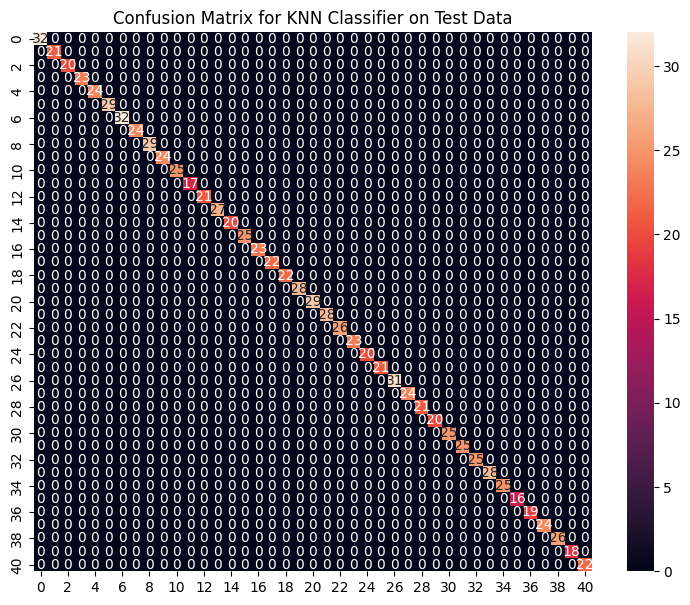

In [9]:
# Create a KNN classifier with specified number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN classifier on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
knn_preds = knn_model.predict(X_test)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, knn_model.predict(X_train))

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, knn_preds)

# Print accuracy scores
print(f"Accuracy on train data by KNN Classifier: {train_accuracy * 100:.2f}%")
print(f"Accuracy on test data by KNN Classifier: {test_accuracy * 100:.2f}%")

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, knn_preds)

# Plot the confusion matrix for KNN Classifier
plt.figure(figsize=(9, 7))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for KNN Classifier on Test Data")
plt.show()


Accuracy on train data by Naive Bayes Classifier: 100.00%
Accuracy on test data by Naive Bayes Classifier: 100.00%


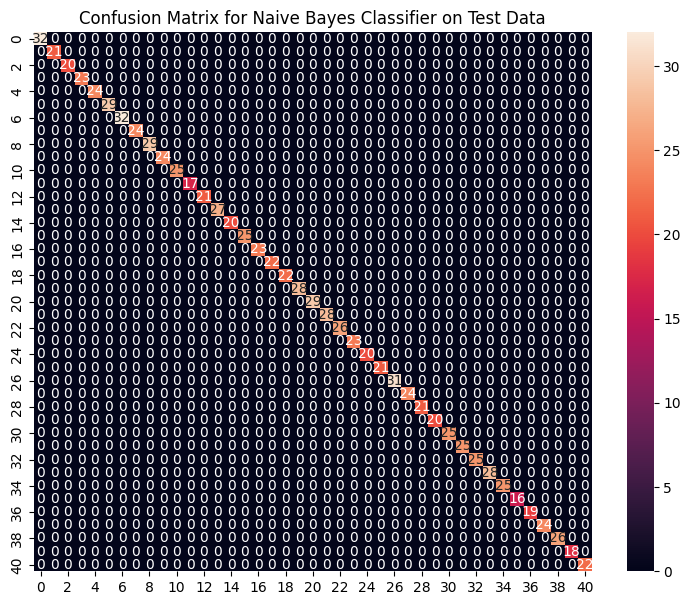

In [10]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()  # Create a Gaussian Naive Bayes classifier

# Train the Naive Bayes classifier on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
preds = nb_model.predict(X_test)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, nb_model.predict(X_train)) * 100

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, preds) * 100

# Print accuracy scores
print(f"Accuracy on train data by Naive Bayes Classifier: {train_accuracy:.2f}%")
print(f"Accuracy on test data by Naive Bayes Classifier: {test_accuracy:.2f}%")

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, preds)

# Plot the confusion matrix for Naive Bayes Classifier
plt.figure(figsize=(9, 7))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on the Test dataset by the combined model: 100.00%


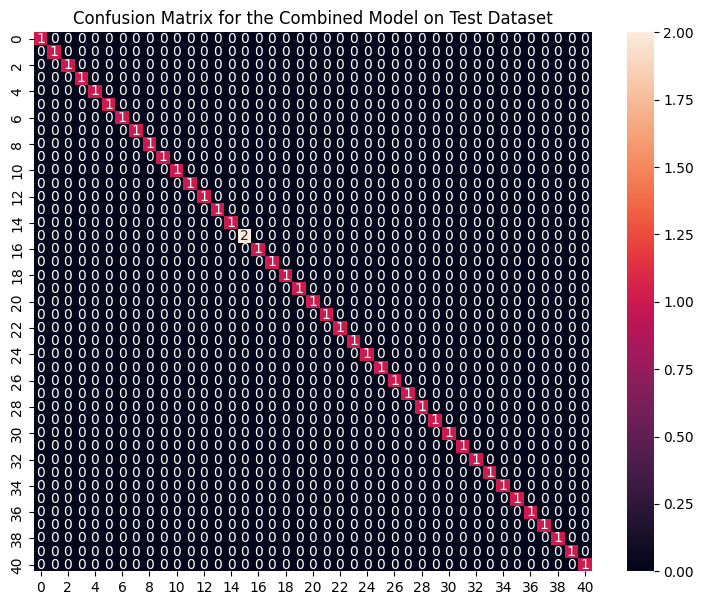

In [11]:
# Training the models on the entire dataset

# Initialize models
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_knn_model = KNeighborsClassifier(n_neighbors=5)
final_gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit models to the entire dataset
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_knn_model.fit(X, y)
final_gb_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

# Separate features and target variable in the test data
test_X = test_data.iloc[:, :-1]
test_Y = LabelEncoder().fit_transform(test_data.iloc[:, -1])  # Using LabelEncoder for test labels

# Making predictions by taking the mode of predictions from all models
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
knn_preds = final_knn_model.predict(test_X)
gb_preds = final_gb_model.predict(test_X)

final_preds = [mode([i, j, k, l])[0] for i, j, k, l in zip(svm_preds, nb_preds, knn_preds, gb_preds)]

# Calculate accuracy on the test data
accuracy = accuracy_score(test_Y, final_preds) * 100
print(f"Accuracy on the Test dataset by the combined model: {accuracy:.2f}%")

# Generate the confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)

# Plot the confusion matrix for the combined model
plt.figure(figsize=(9, 7))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for the Combined Model on Test Dataset")
plt.show()


In [17]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index
warnings.filterwarnings("ignore", category=UserWarning)
data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

# Define a function to predict disease using the combined model
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    
    # Filling the input data with 1 if the symptom is present and 0 otherwise
    for symptom in symptoms:
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1

    # Making predictions with all three models
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict([input_data])[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict([input_data])[0]]
    knn_prediction = data_dict["predictions_classes"][final_knn_model.predict([input_data])[0]]
    gb_prediction = data_dict["predictions_classes"][final_gb_model.predict([input_data])[0]]   

    # Determine the mode of the predictions
    predictions_array = np.array([nb_prediction, svm_prediction, knn_prediction])
    unique_predictions, counts = np.unique(predictions_array, return_counts=True)
    final_prediction = unique_predictions[counts.argmax()]

    predictions = {
        "Naive Bayes Prediction": nb_prediction,
        "SVM Model Prediction": svm_prediction,
        "KNN Model Prediction": knn_prediction,
        "Gradient Boost Model Prediction": gb_prediction,
        "Final Prediction": final_prediction
    }
    
    return final_prediction

# Testing the function
symptom_input = input("Enter your symptoms: ")
result = predictDisease(symptom_input)
print("Predicted disease is: ", result)

Predicted disease is:  Paralysis (brain hemorrhage)


In [24]:
# Prompt the user to enter their current location
loc = input("Enter your current location: ")
loc = loc.lower()  # Convert the input to lowercase for case-insensitive comparison

# Open the file containing hospital data
with open('D:\\Engineering\\Programming\\Pyhton\\Projects\\Group 15\\HospitalData.txt', 'r') as file:
    data = file.readlines()  # Read all lines from the file into a list

# Create a list of hospitals, converting each hospital name to lowercase and removing leading/trailing whitespace
lst_hospitals = [hospital.lower().strip() for hospital in data]

# Initialize an empty list to store hospitals near the user's location
hospitals_near = []

# Iterate through the list of hospitals
for hospital in lst_hospitals:
    # Check if the user's location is in the hospital name
    if loc in hospital:
        # If '|' is found in the hospital name, extract the part after '|' as the nearby hospital
        if '|' in hospital:
            hospitals_near.append(hospital[hospital.find('|') + len(loc) + 1:])

random.seed()
count = len(hospitals_near)

final_hospitals = []

# Iterate from index 2 to a random index (excluding the random index itself)
for i in range(1, random.randrange(2, count)):
    final_hospitals.append(hospitals_near[i])

print(final_hospitals)
print("Number of finalized hospitals :", len(final_hospitals))


[' pune district hospital pune,dhp government', ' talegaon dr bhausaheb sardesai talegaon rural hospital, dbs private', ' baramati giriraj hospital,grh private', ' chinchwad lokmanya hospital chinchwad,lhc private']
Number of finalized hospitals : 4


In [28]:
import urllib.request, urllib.parse, urllib.error
import json
import sqlite3

api_key = False
# if you have a google places API key

if api_key is False:
    api_key = 42
    servic_url = "http://py4e-data.dr-chuck.net/json?"  # URL for fetching geolocation data
else:
    servic_url = "https://maps.googleapis.com/maps/api/geocode/json?"  # URL for fetching geolocation data

# Connect to or create a SQLite database file named Geodata.sqlite
conn = sqlite3.connect('Geodata.sqlite')
cur = conn.cursor()  # Create a cursor object to execute SQL commands

# Create a table named Locations if it does not exist already in the database
cur.execute('''CREATE TABLE IF NOT EXISTS Locations (address TEXT, geodata TEXT)''')

# 'final_hospitals' is a list containing hospital addresses

handle = final_hospitals
count = 0

# Iterate through each hospital address in the 'final_hospitals' list
for line in handle:
    if count > len(final_hospitals):  # Check if the count exceeds the number of hospitals in the list
        print(len(final_hospitals), "location retrieved restart to retrieve more.")
        break

    address = line.strip()  # Strip leading and trailing whitespace from the address
    print('')
    
    # Check if the address already exists in the database
    cur.execute('''SELECT geodata FROM Locations WHERE address = ? ''',
                (memoryview(address.encode()),))

    try:
        data = cur.fetchone()[0]  # Retrieve geolocation data from the database
        print("Data found in database ", address)
        continue
    except:
        pass

    params = dict()
    params['address'] = address

    if api_key is not False:
        params['key'] = api_key

    url = servic_url + urllib.parse.urlencode(params)  # Construct the URL with query parameters

    print("Retrieving: ")

    url_handle = urllib.request.urlopen(url)  # Open the URL
    data = url_handle.read().decode()  # Read data from the URL response
    print("Retrieved", len(data), "characters", data[:11].replace('\n', ' '))
    count += 1

    try:
        js = json.loads(data)  # Parse the JSON data
    except:
        print(data)
        pass

    # Check if the JSON data contains a 'status' field and it is 'OK' or 'ZERO_RESULTS'
    if 'status' not in js or (js['status'] != 'OK' and js['status'] != 'ZERO_RESULTS'):
        print("=== Failed to Retrieve ===")
        print(data)
        break

    # Insert the address and geolocation data into the database
    cur.execute('''INSERT INTO Locations (address, geodata) VALUES (?, ?)''',
                (memoryview(address.encode()), memoryview(data.encode())))
    conn.commit()

print("\nRun geodump.py to read the data from the database and visualize.")



Data found in database  pune district hospital pune,dhp government

Data found in database  talegaon dr bhausaheb sardesai talegaon rural hospital, dbs private

Data found in database  baramati giriraj hospital,grh private

Data found in database  chinchwad lokmanya hospital chinchwad,lhc private

Run geodump.py to read the data from the database and visualize.


In [29]:
import sqlite3
import json
import codecs

# Connect to the SQLite database file
conn = sqlite3.connect('D:\\Engineering\\Programming\\Pyhton\\Projects\\Group 15\\Geodata.sqlite')
cur = conn.cursor()

# Execute a SQL query to select all rows from the Locations table
cur.execute('SELECT * FROM Locations')

# Open a new file named 'where.js' in write mode with UTF-8 encoding
fhand = codecs.open('where.js', 'w', "utf-8")
fhand.write("myData = [\n")  # Write the start of a JavaScript array declaration

count = 0  # Initialize a counter to keep track of records processed
for row in cur:
    data = str(row[1].decode())  # Decode the geodata from bytes to string
    try:
        js = json.loads(str(data))  # Parse the JSON data
    except:
        continue

    # Check if the JSON data contains a 'status' field and it is 'OK'
    if not('status' in js and js['status'] == 'OK'):
        continue

    # Extract latitude and longitude from the JSON data
    lat = js["results"][0]["geometry"]["location"]["lat"]
    lng = js["results"][0]["geometry"]["location"]["lng"]

    # Skip records with latitude or longitude equal to 0
    if lat == 0 or lng == 0:
        continue

    # Extract the formatted address from the JSON data
    where = js['results'][0]['formatted_address']
    where = where.replace("'", "")  # Replace single quotes with empty string

    try:
        print(where, lat, lng)  # Print the formatted address, latitude, and longitude

        count = count + 1  # Increment the counter
        if count > 1:
            fhand.write(",\n")  # Add a comma and new line if it's not the first record
        output = "[" + str(lat) + "," + str(lng) + ", '" + where + "']"  # Format the output string
        fhand.write(output)  # Write the output string to the file
    except:
        continue

fhand.write("\n];\n")  # Write the end of the JavaScript array declaration
cur.close()  # Close the cursor
fhand.close()  # Close the file
print(count, "records written to where.js")  # Print the number of records written
print("Open where.html to view the data in a browser")  # Print instructions to view the data


Pune, Maharashtra, India 18.5204303 73.8567437
Talegaon Dabhade, Maharashtra, India 18.7375763 73.67466259999999
Baramati, Maharashtra, India 18.1791791 74.6077971
314 / B, Chinchwad Gaon Rd, Udyog Nagar, Chinchwad, Pune, Pimpri-Chinchwad, Maharashtra 411033, India 18.637315 73.7902847
4 records written to where.js
Open where.html to view the data in a browser
